# EDA of Citibike Data

In [19]:
# neccisary imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# extract data from parquet
full_df = pd.read_parquet("/Users/zoehightower/Downloads/citi_bike_prediction_assignment/data/final_aggregated.parquet")
full_df.head()

,datetime,hour,hourly_count,dow,month,year,day_index,is_weekend,work_rush,hour_sin,...,month_cos,date,is_holiday,is_near_holiday,holiday_code,temperature_2m,precipitation,temperature_in_celsius,precipitation_in_mm,trend
0,2013-06-01 00:00:00,0,152,5,6,2013,0,1,0,0.000000,...,-0.866025,2013-06-01,0,0,-1,22.5,0.0,22.5,0.0,18517.091131
1,2013-06-01 01:00:00,1,102,5,6,2013,0,1,0,0.258819,...,-0.866025,2013-06-01,0,0,-1,21.7,0.0,21.7,0.0,18517.091131
2,2013-06-01 02:00:00,2,67,5,6,2013,0,1,0,0.500000,...,-0.866025,2013-06-01,0,0,-1,21.0,0.0,21.0,0.0,18517.091131
3,2013-06-01 03:00:00,3,41,5,6,2013,0,1,0,0.707107,...,-0.866025,2013-06-01,0,0,-1,20.4,0.0,20.4,0.0,18517.091131
4,2013-06-01 04:00:00,4,16,5,6,2013,0,1,0,0.866025,...,-0.866025,2013-06-01,0,0,-1,19.9,0.0,19.9,0.0,18517.091131


## 1. Day of Week

### 1a. Day Differences

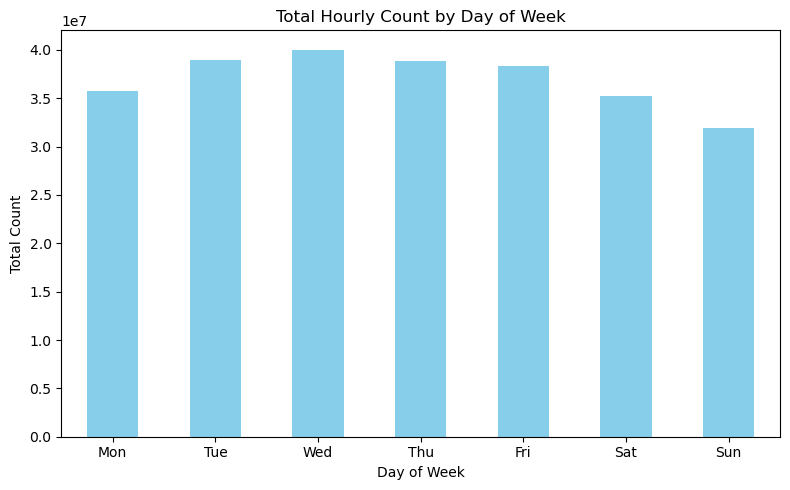

In [21]:
dow_map = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
dow_counts = full_df.groupby("dow")["hourly_count"].sum().rename(index=dow_map)

plt.figure(figsize=(8, 5))
dow_counts.plot(kind='bar', color='skyblue')
plt.title("Total Hourly Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 1b. Weekend vs. Weekday Differences

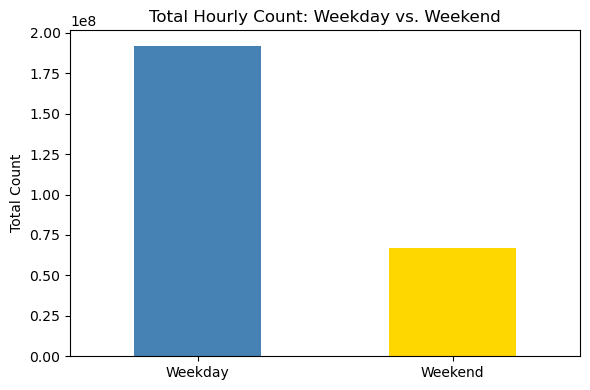

In [22]:
weekend_map = {0: "Weekday", 1: "Weekend"}
weekend_counts = full_df.groupby("is_weekend")["hourly_count"].sum().rename(index=weekend_map)

plt.figure(figsize=(6, 4))
weekend_counts.plot(kind='bar', color=['steelblue', 'gold'])
plt.title("Total Hourly Count: Weekday vs. Weekend")
plt.xlabel("")
plt.ylabel("Total Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2. Time of day

### 2a. Hour popularity

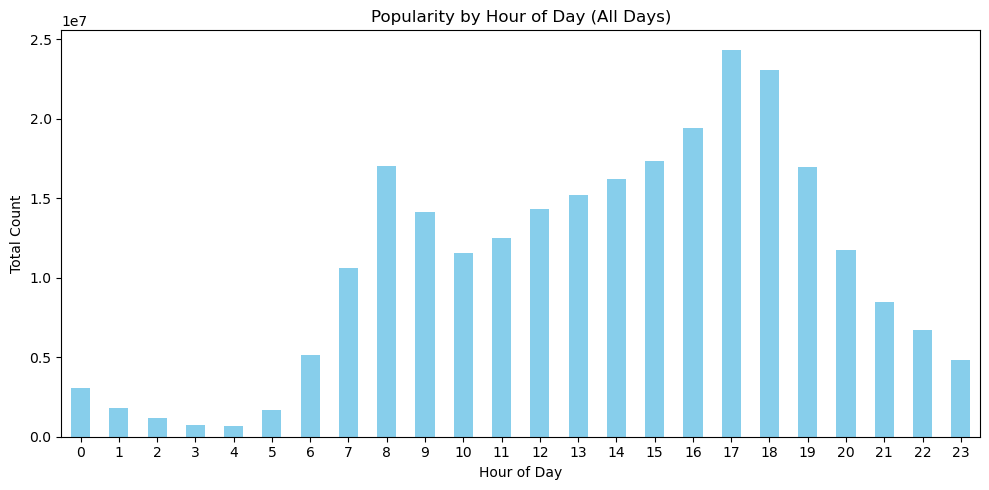

In [23]:
hour_counts = full_df.groupby("hour")["hourly_count"].sum()
plt.figure(figsize=(10,5))
hour_counts.plot(kind='bar', color='skyblue')
plt.title("Popularity by Hour of Day (All Days)")
plt.xlabel("Hour of Day")
plt.ylabel("Total Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 2b. Day of week hourly

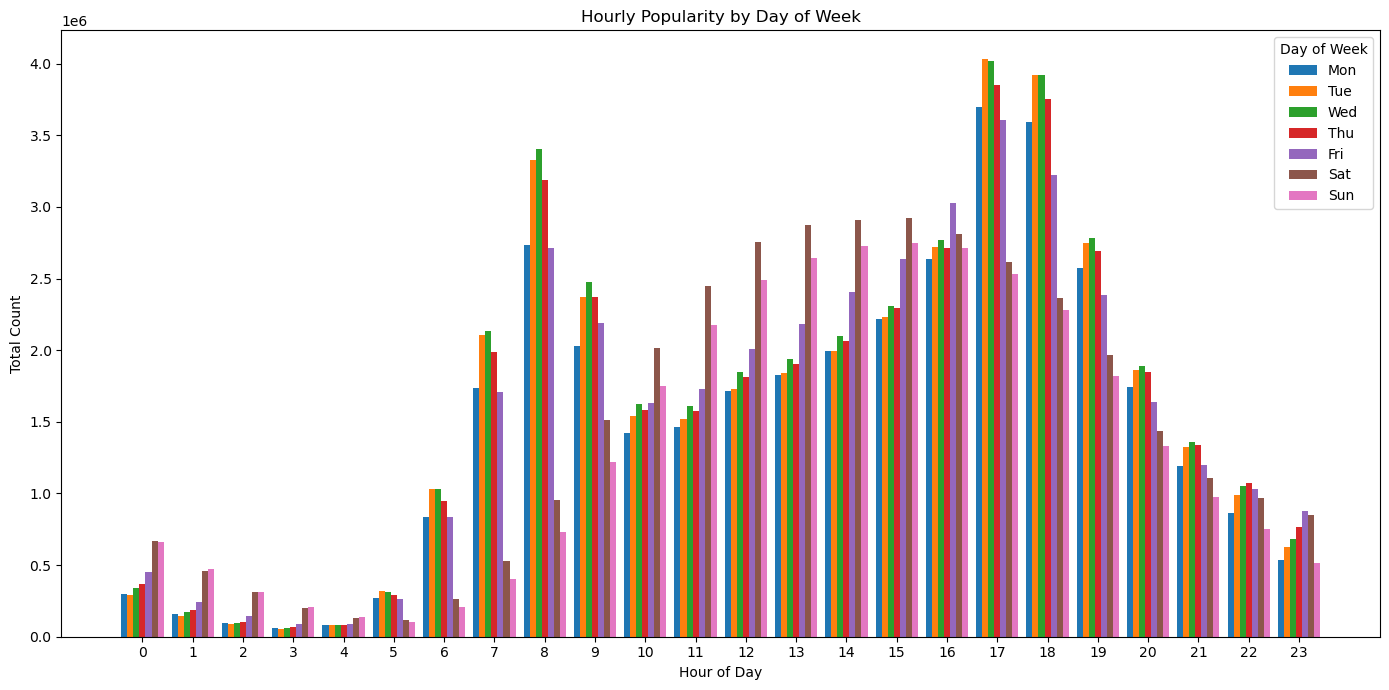

In [24]:
hour_dow = full_df.groupby(["hour", "dow"])["hourly_count"].sum().unstack().rename(columns=dow_map)
hours = np.arange(24)

plt.figure(figsize=(14,7))
width = 0.12
for i, day in enumerate(hour_dow.columns):
    plt.bar(hours + i*width, hour_dow[day], width=width, label=day)

plt.title("Hourly Popularity by Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Total Count")
plt.xticks(hours + width*3, hours)  # Center x labels
plt.legend(title="Day of Week")
plt.tight_layout()
plt.show()

### 2c. Hourly Weekend vs. Weekday popularity

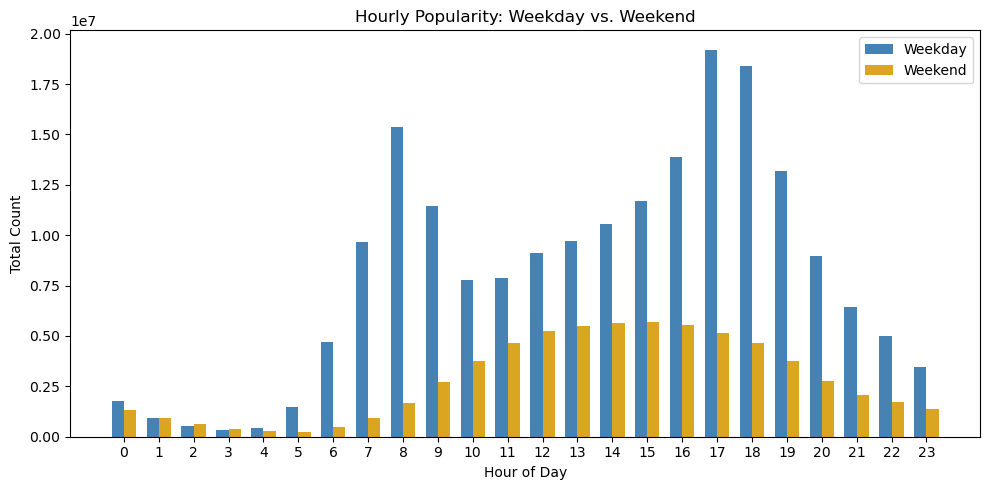

In [26]:
hour_weekend = full_df.groupby(["hour", "is_weekend"])["hourly_count"].sum().unstack().rename(columns=weekend_map)

plt.figure(figsize=(10,5))
width = 0.35
plt.bar(hours - width/2, hour_weekend["Weekday"], width=width, label="Weekday", color="steelblue")
plt.bar(hours + width/2, hour_weekend["Weekend"], width=width, label="Weekend", color="goldenrod")

plt.title("Hourly Popularity: Weekday vs. Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Total Count")
plt.xticks(hours)
plt.legend()
plt.tight_layout()
plt.show()

## 3. Weather

### 3a. Percipitation amount and ridership

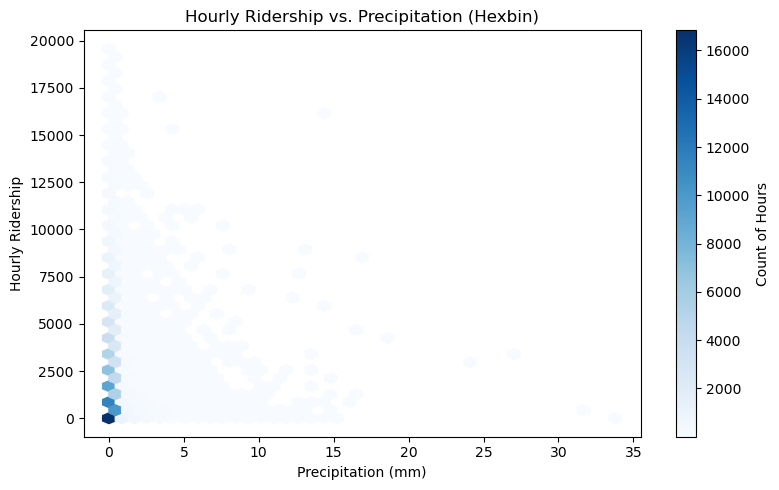

In [29]:
plt.figure(figsize=(8,5))
plt.hexbin(full_df["precipitation_in_mm"], full_df["hourly_count"], gridsize=40, cmap="Blues", mincnt=1)
plt.colorbar(label="Count of Hours")
plt.title("Hourly Ridership vs. Precipitation (Hexbin)")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Hourly Ridership")
plt.tight_layout()
plt.show()

### 3b. Temperature and ridership

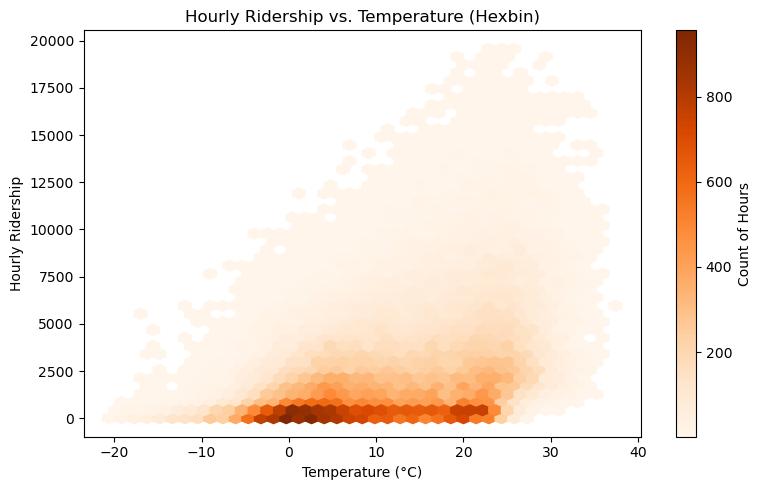

In [30]:
plt.figure(figsize=(8,5))
plt.hexbin(full_df["temperature_in_celsius"], full_df["hourly_count"], gridsize=40, cmap="Oranges", mincnt=1)
plt.colorbar(label="Count of Hours")
plt.title("Hourly Ridership vs. Temperature (Hexbin)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Hourly Ridership")
plt.tight_layout()
plt.show()

## 4. Holiday

### 4a. Holiday vs. Non-holiday Vs. Near Holiday

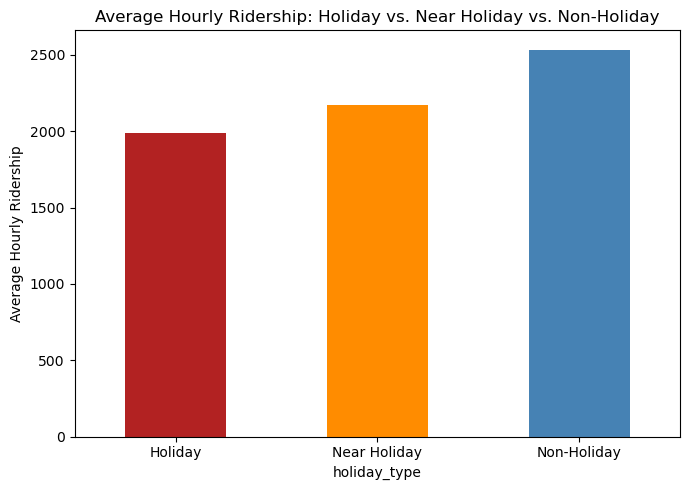

In [35]:
def holiday_type(row):
    if row["is_holiday"] == 1:
        return "Holiday"
    elif row["is_near_holiday"] == 1:
        return "Near Holiday"
    else:
        return "Non-Holiday"

full_df["holiday_type"] = full_df.apply(holiday_type, axis=1)

# Compute averages
holiday_avgs = full_df.groupby("holiday_type")["hourly_count"].mean().reindex(["Holiday", "Near Holiday", "Non-Holiday"])

plt.figure(figsize=(7,5))
holiday_avgs.plot(kind='bar', color=["firebrick", "darkorange", "steelblue"])
plt.title("Average Hourly Ridership: Holiday vs. Near Holiday vs. Non-Holiday")
plt.ylabel("Average Hourly Ridership")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 5. Daily Trend vs. Actual

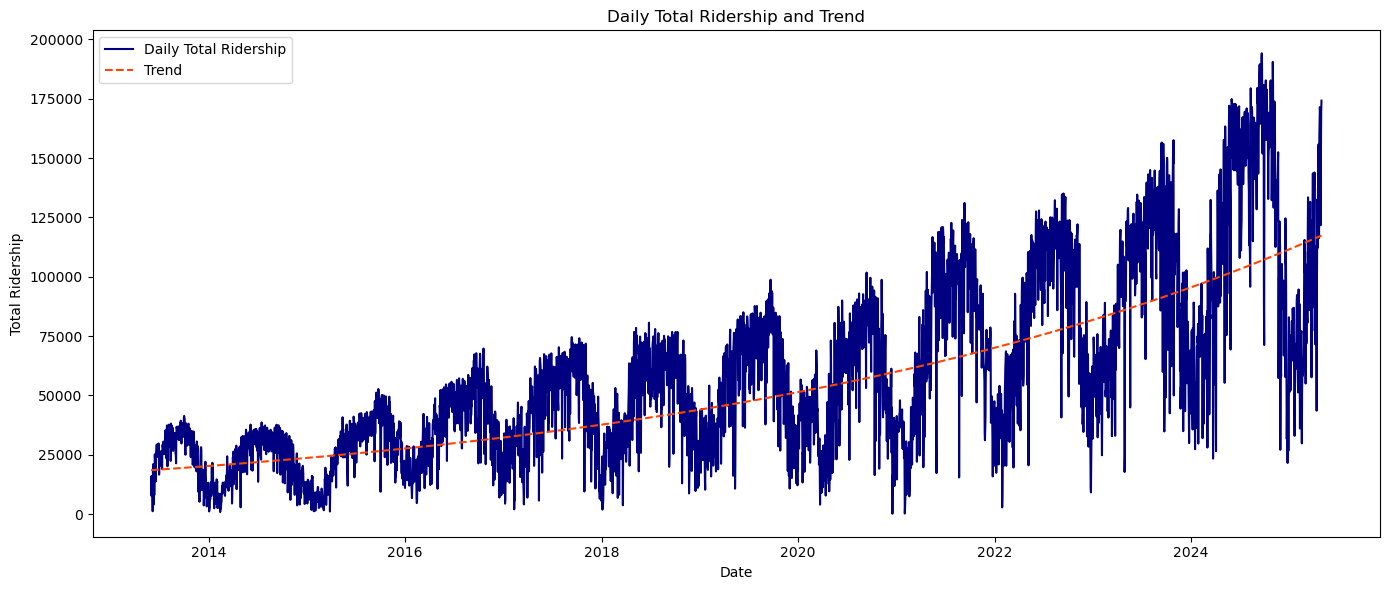

In [36]:
# First, aggregate to daily totals
daily = full_df.groupby("date").agg({
    "hourly_count": "sum",
    "trend": "first"  # or 'mean', depending on how your trend column is structured
}).reset_index()

plt.figure(figsize=(14,6))
plt.plot(daily["date"], daily["hourly_count"], label="Daily Total Ridership", color="navy")
plt.plot(daily["date"], daily["trend"], label="Trend", color="orangered", linestyle="--")
plt.title("Daily Total Ridership and Trend")
plt.xlabel("Date")
plt.ylabel("Total Ridership")
plt.legend()
plt.tight_layout()
plt.show()

## 6. Calandar

### 6a. Month

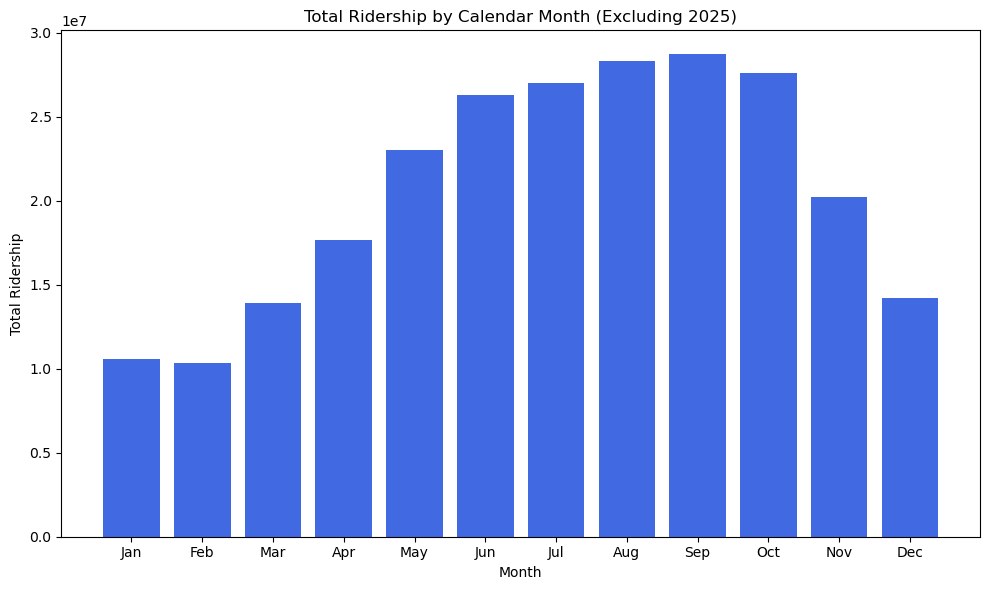

In [39]:

# Ensure date is datetime
full_df["date"] = pd.to_datetime(full_df["date"])

# Filter out 2025
full_df = full_df[full_df["date"].dt.year != 2025]

# Extract month number and month name for grouping
full_df["month_num"] = full_df["date"].dt.month
full_df["month_name"] = full_df["date"].dt.strftime("%b")

# Group by month and sum total counts
month_total = full_df.groupby("month_num")["hourly_count"].sum()
month_total = month_total.reindex(range(1, 13))
month_labels = [full_df[full_df["month_num"] == i]["month_name"].iloc[0] for i in range(1, 13)]

# Plot
plt.figure(figsize=(10,6))
plt.bar(month_labels, month_total, color="royalblue")
plt.title("Total Ridership by Calendar Month (Excluding 2025)")
plt.xlabel("Month")
plt.ylabel("Total Ridership")
plt.tight_layout()
plt.show()


### 6b. Year

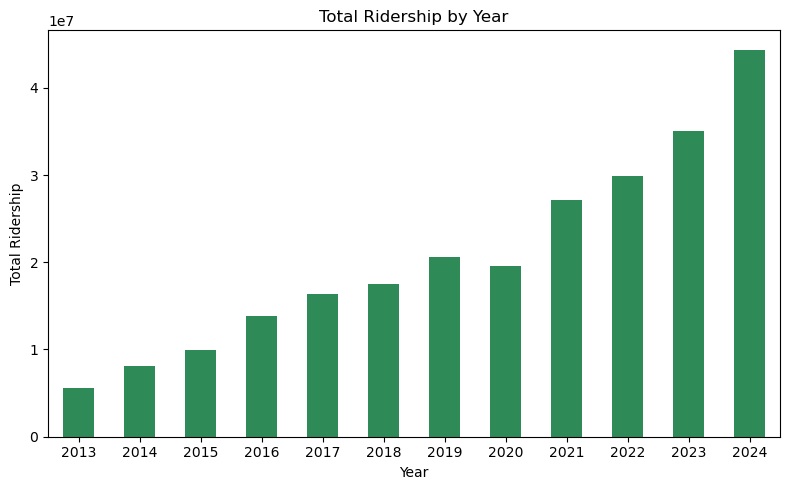

In [45]:
# Ensure date is datetime
full_df["date"] = pd.to_datetime(full_df["date"])

# Extract year
full_df["year"] = full_df["date"].dt.year

years_to_include = full_df["year"].unique()
df_years = full_df

# Group by year and sum total counts
year_total = df_years.groupby("year")["hourly_count"].sum()

# Plot
plt.figure(figsize=(8,5))
year_total.plot(kind="bar", color="seagreen")
plt.title("Total Ridership by Year")
plt.xlabel("Year")
plt.ylabel("Total Ridership")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 7. Work Rush

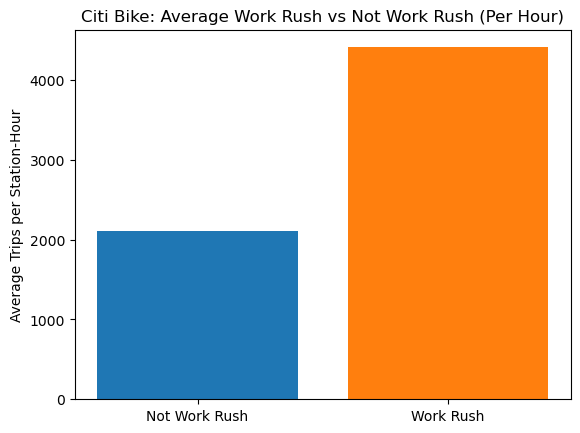

In [49]:
averages = full_df.groupby("work_rush")["hourly_count"].mean()
labels = ['Not Work Rush', 'Work Rush']  # 0 = Not, 1 = Rush

plt.bar(labels, [averages.get(0, 0), averages.get(1, 0)], color=['#1f77b4', '#ff7f0e'])
plt.ylabel("Average Trips per Station-Hour")
plt.title("Citi Bike: Average Work Rush vs Not Work Rush (Per Hour)")
plt.show()